In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [2]:
sales_df = pd.read_excel(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx', sheet_name="SalesFact")

In [3]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.sort_values(by='Date', inplace=True)

In [4]:
sales_daily = sales_df[['Date', 'Revenue']].groupby('Date').sum()

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(sales_daily)

In [6]:
train_data=pd.read_csv(r'D:\Du An\Data FLow\v1\data\train.csv')

In [7]:
test_data = pd.read_csv(r'D:\Du An\Data FLow\v1\data\test.csv')

In [8]:
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    if len(data) <= time_step:
        print("Dữ liệu quá ít để tạo mẫu LSTM.")
        return np.array(X), np.array(y)
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

In [9]:
time_step = 30  # Dùng 30 ngày trước để dự báo ngày tiếp theo
X_train, y_train = create_lstm_dataset(train_data, time_step)
X_test, y_test = create_lstm_dataset(test_data, time_step)

KeyError: 30

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0060 - val_loss: 0.0032
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0059 - val_loss: 0.0030
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0063 - val_loss: 0.0030
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0055 - val_loss: 0.0034
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 9/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0061 - val_loss: 0.0030
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0053 - val_loss: 0.0032
Epoch 11/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0061 - val_loss: 0.0030
Epoch 12/50
211/211 ━━━━━━━━━━━━━━━━━

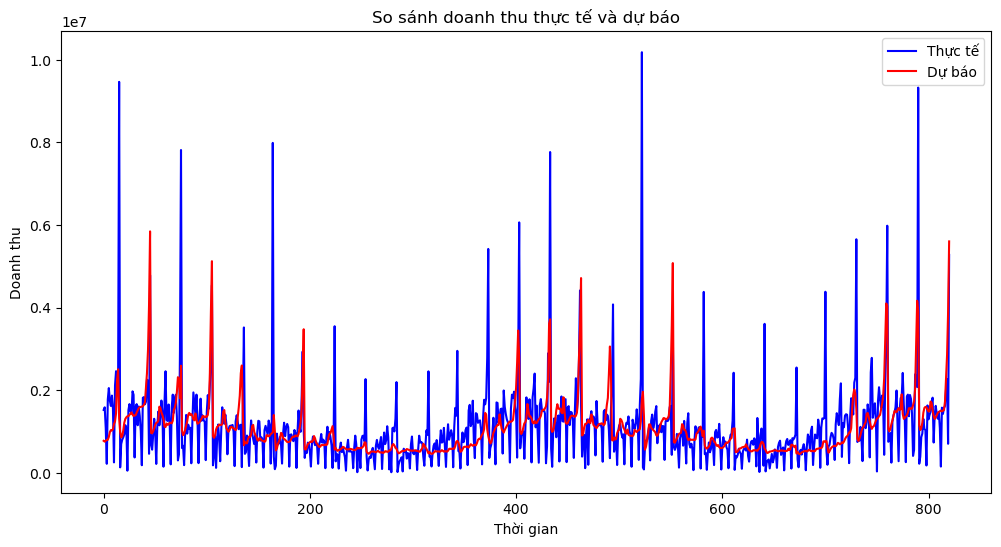

In [ ]:
sales_df = pd.read_excel(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx', sheet_name="SalesFact")
# Chuyển đổi cột Date sang datetime và sắp xếp dữ liệu
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu theo ngày
sales_daily = sales_df[['Date', 'Revenue']].groupby('Date').sum()

# Chuẩn hóa dữ liệu về khoảng [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(sales_daily)

# Chia tập dữ liệu thành train (80%) và test (20%)
train_size = int(len(sales_scaled) * 0.8)
train_data, test_data = sales_scaled[:train_size], sales_scaled[train_size:]

# Hàm tạo tập dữ liệu cho LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    if len(data) <= time_step:
        print("Dữ liệu quá ít để tạo mẫu LSTM.")
        return np.array(X), np.array(y)
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

# Tạo tập train và test
time_step = 30  # Dùng 30 ngày trước để dự báo ngày tiếp theo
X_train, y_train = create_lstm_dataset(train_data, time_step)
X_test, y_test = create_lstm_dataset(test_data, time_step)

# Kiểm tra nếu dữ liệu không đủ để train
if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError("Dữ liệu không đủ để huấn luyện mô hình LSTM. Hãy kiểm tra tập dữ liệu đầu vào.")

# Định dạng lại dữ liệu cho LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - loss: 0.0065 - val_loss: 0.0032
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 32s 151ms/step - loss: 0.0057 - val_loss: 0.0030
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 24s 114ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - loss: 0.0059 - val_loss: 0.0030
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0064 - val_loss: 0.0029
Epoch 9/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 11/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 12/50
211/211 ━━━━━━

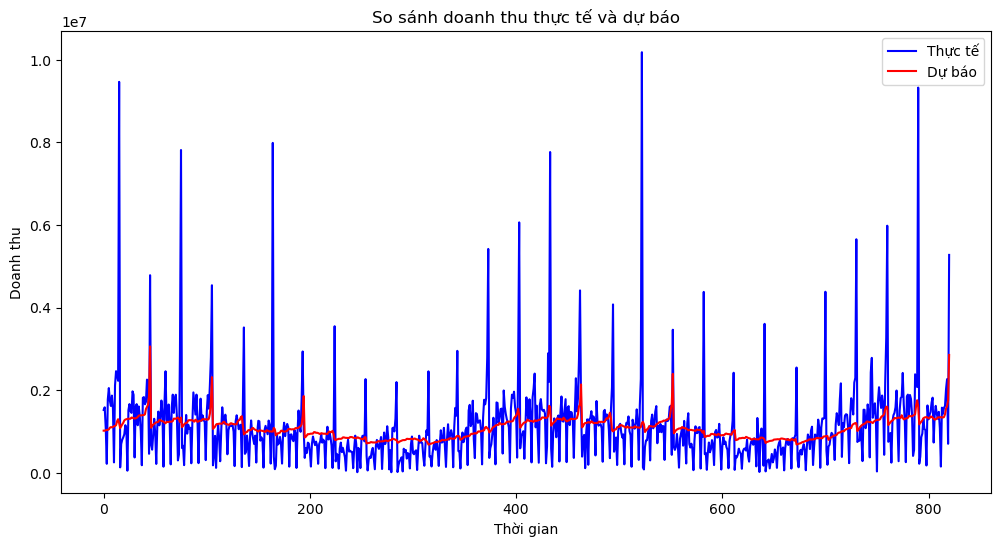

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_step, 1)),  
    Dropout(0.2),
    
    LSTM(64, return_sequences=True),  
    Dropout(0.2),
    
    LSTM(64, return_sequences=False),  
    Dropout(0.2),
    
    Dense(50, activation='relu'),  
    Dense(25, activation='relu'),
    Dense(1)  
])


# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - loss: 0.1043 - val_loss: 0.0224
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0165 - val_loss: 0.0070
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - loss: 0.0099 - val_loss: 0.0034
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0069 - val_loss: 0.0038
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 9/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0068 - val_loss: 0.0047
Epoch 11/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 12/50
211/211 ━━━━━━━━━━

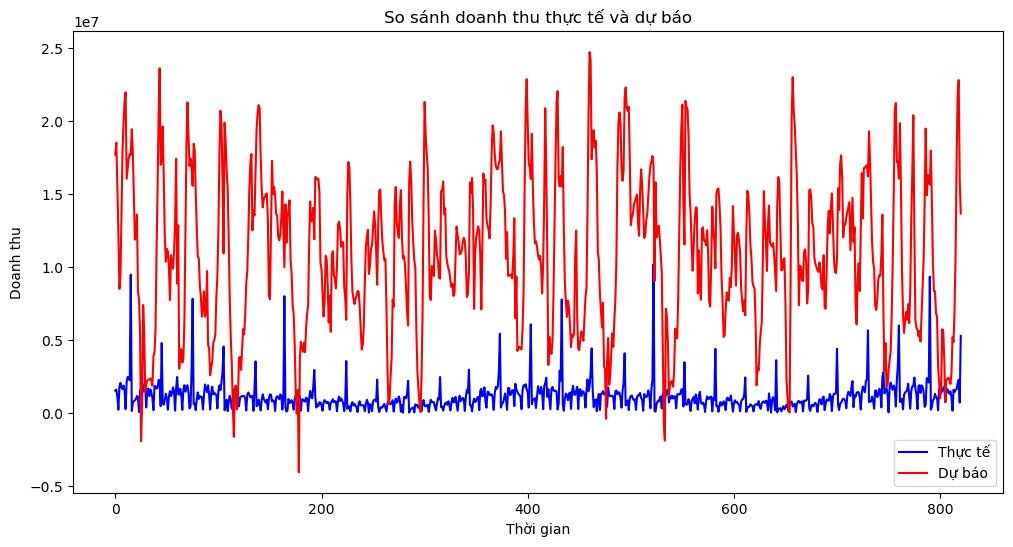

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_step, 1)),
    BatchNormalization(),
    Dropout(0.2),
    
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    
    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 52s 94ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - loss: 0.0050 - val_loss: 0.0026
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - loss: 0.0047 - val_loss: 0.0024
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 9/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 11/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 12/50
211/211 ━━━━━━━━━

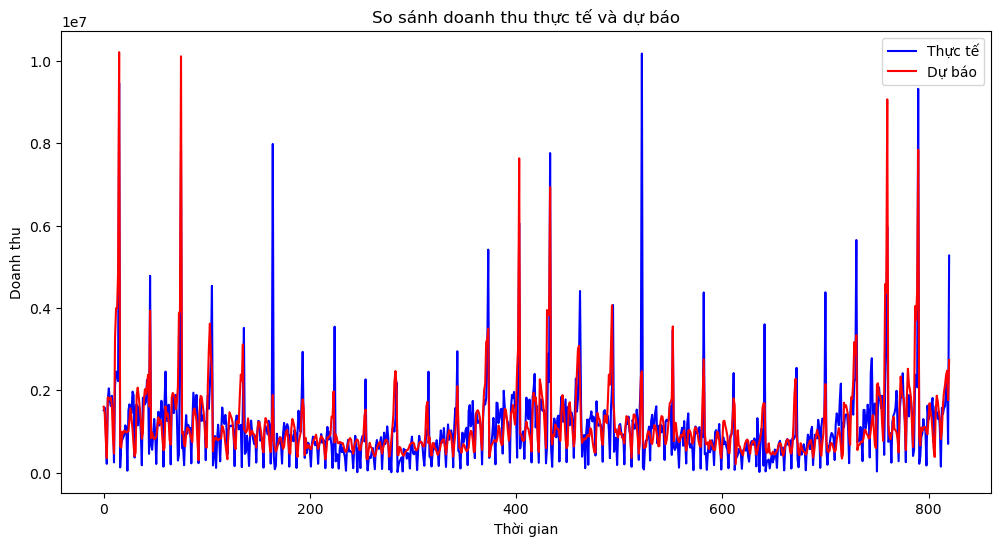

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.2),
    
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0055 - val_loss: 0.0039
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 9/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 11/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 12/50
211/211 ━━━━━━━━━━━━━━━━━━━━

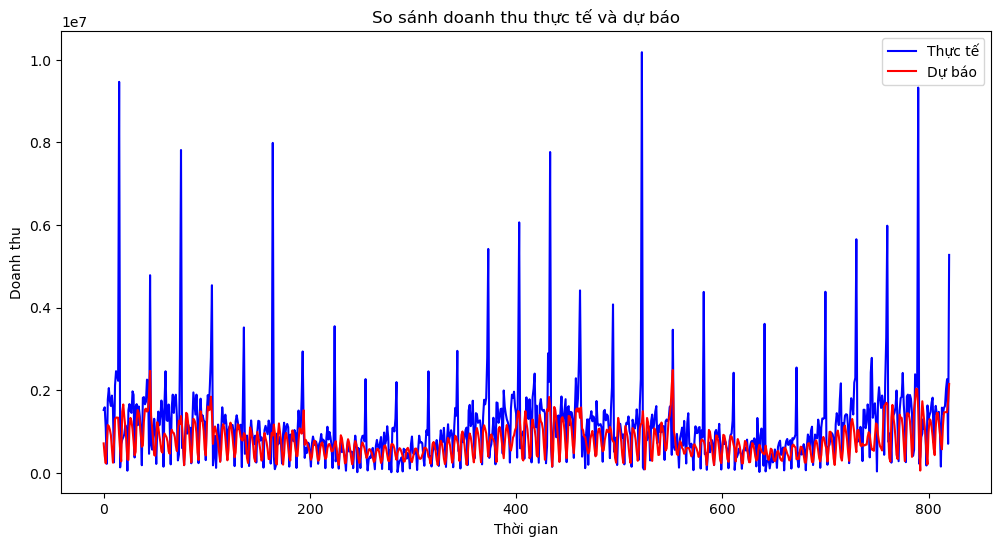

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 54s 90ms/step - loss: 0.0054 - val_loss: 0.0033
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - loss: 0.0054 - val_loss: 0.0037
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 37s 172ms/step - loss: 0.0057 - val_loss: 0.0030
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 28s 130ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 9/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 11/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 12/50
211/211 ━━━━━━

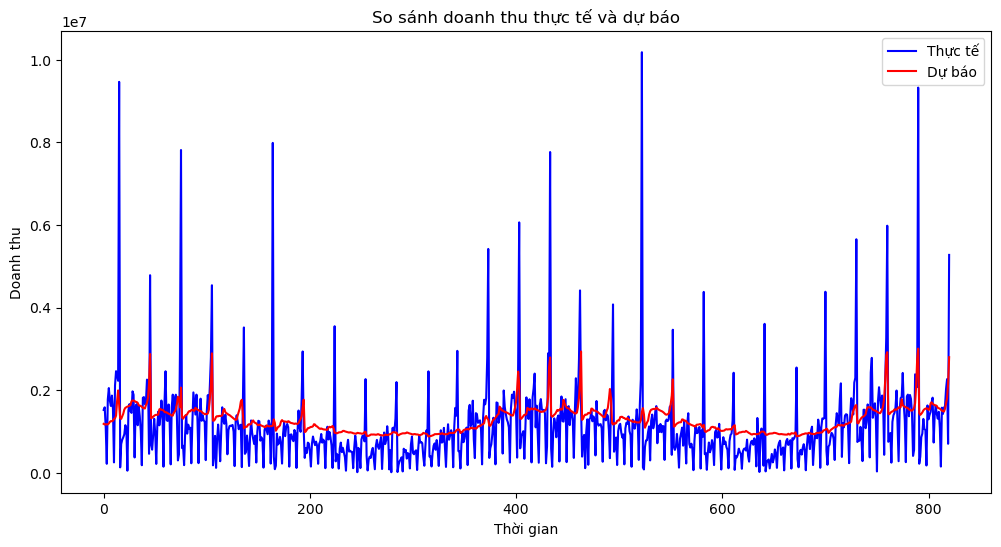

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(48, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(48, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


211/211 ━━━━━━━━━━━━━━━━━━━━ 73s 151ms/step - loss: 0.0142 - val_loss: 0.0039
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 28s 130ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 136ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 9/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 30s 141ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 27s 130ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 11/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 12/50
211/211 ━━━━━━━━━━━

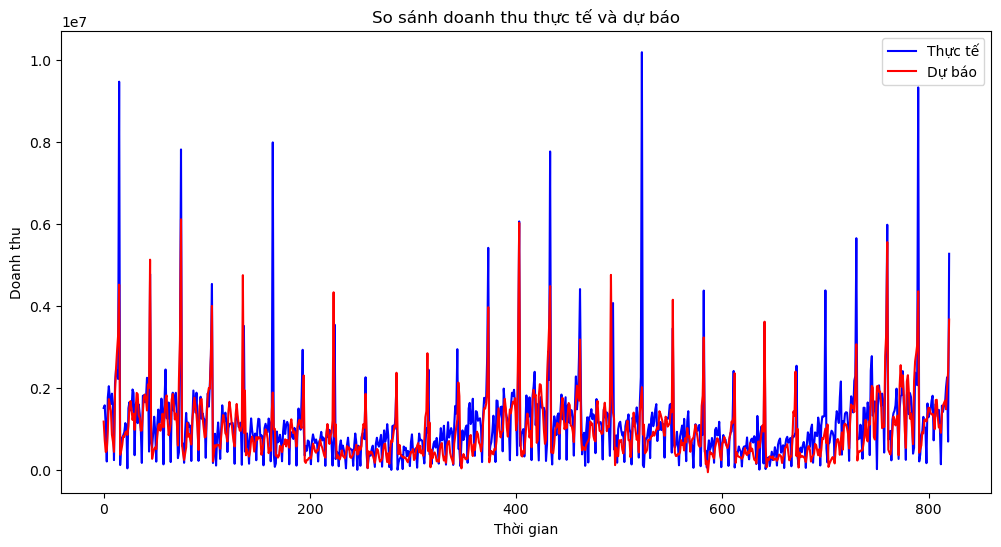

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

# Xây dựng mô hình BiLSTM cải tiến
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_step, 1))),  
    BatchNormalization(),
    Dropout(0.15),

    Bidirectional(LSTM(64, return_sequences=True)),  
    BatchNormalization(),
    Dropout(0.1),

    Bidirectional(LSTM(32, return_sequences=False)),  
    Dropout(0.1),

    Dense(50),
    LeakyReLU(alpha=0.1),  
    Dense(25),
    LeakyReLU(alpha=0.1),

    Dense(1)
])

# Biên dịch mô hình với optimizer AdamW
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Multiply, Permute
from tensorflow.keras.optimizers import AdamW
import tensorflow.keras.backend as K

# Định nghĩa Attention Block
def attention_block(inputs):
    time_steps = inputs.shape[1]  # Số bước thời gian
    attention_probs = Dense(time_steps, activation='softmax')(inputs)  # (batch_size, time_steps, time_steps)
    
    # Đảm bảo kích thước phù hợp
    attention_probs = Permute((2, 1))(attention_probs)  # (batch_size, hidden_units, time_steps)
    
    # Nhân với inputs
    attention_out = Multiply()([inputs, attention_probs])
    
    return attention_out

# Xây dựng mô hình BiLSTM với Attention
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_step, 1))),  
    BatchNormalization(),
    Dropout(0.15),

    Bidirectional(LSTM(64, return_sequences=True)),  
    BatchNormalization(),
    Dropout(0.1),

    # Thêm Attention Layer
    attention_block,

    Bidirectional(LSTM(32, return_sequences=False)),  
    Dropout(0.1),

    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

# Biên dịch mô hình với optimizer AdamW
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <function attention_block at 0x00000169894A8B80> (of type <class 'function'>)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Multiply, Permute
from tensorflow.keras.optimizers import AdamW
import tensorflow.keras.backend as K

# Định nghĩa Attention Block
def attention_block(inputs):
    time_steps = inputs.shape[1]  # Số bước thời gian
    attention_probs = Dense(time_steps, activation='softmax')(inputs)  # (batch_size, time_steps, time_steps)
    
    # Đảm bảo kích thước phù hợp
    attention_probs = Permute((2, 1))(attention_probs)  # (batch_size, hidden_units, time_steps)
    
    # Nhân với inputs
    attention_out = Multiply()([inputs, attention_probs])
    
    return attention_out

# Xây dựng mô hình BiLSTM với Attention
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_step, 1))),  
    BatchNormalization(),
    Dropout(0.15),

    Bidirectional(LSTM(64, return_sequences=True)),  
    BatchNormalization(),
    Dropout(0.1),

    # Thêm Attention Layer
    attention_block,

    Bidirectional(LSTM(32, return_sequences=False)),  
    Dropout(0.1),

    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

# Biên dịch mô hình với optimizer AdamW
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f'R-Squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Thực tế', color='blue')
plt.plot(y_pred_inv, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <function attention_block at 0x000001698D385EE0> (of type <class 'function'>)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Đọc dữ liệu từ file Excel
sales_df = pd.read_excel(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx', sheet_name="SalesFact")


# Chuyển đổi cột Date sang datetime và sắp xếp dữ liệu
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_daily = sales_df[['Date', 'Revenue', 'Quantity']].groupby('Date').sum()

# Chuẩn hóa dữ liệu về khoảng [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(sales_daily)

# Chia tập dữ liệu thành train (80%) và test (20%)
train_size = int(len(sales_scaled) * 0.8)
train_data, test_data = sales_scaled[:train_size], sales_scaled[train_size:]

# Hàm tạo tập dữ liệu cho LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    if len(data) <= time_step:
        print("Dữ liệu quá ít để tạo mẫu LSTM.")
        return np.array(X), np.array(y)
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

# Tạo tập train và test
time_step = 30  # Dùng 30 ngày trước để dự báo ngày tiếp theo
X_train, y_train = create_lstm_dataset(train_data, time_step)
X_test, y_test = create_lstm_dataset(test_data, time_step)

# Kiểm tra nếu dữ liệu không đủ để train
if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError("Dữ liệu không đủ để huấn luyện mô hình LSTM. Hãy kiểm tra tập dữ liệu đầu vào.")

# Định dạng lại dữ liệu cho LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Cải tiến kiến trúc mô hình LSTM với Bi-Directional
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, X_train.shape[2]))),
    Dropout(0.3),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(2)  # Dự báo cả Revenue và Quantity
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu và số lượng bán
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test)

# Đánh giá mô hình
r2_revenue = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])
mape_revenue = mean_absolute_percentage_error(y_test_inv[:, 0], y_pred_inv[:, 0])
rmse_revenue = np.sqrt(mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))

r2_quantity = r2_score(y_test_inv[:, 1], y_pred_inv[:, 1])
mape_quantity = mean_absolute_percentage_error(y_test_inv[:, 1], y_pred_inv[:, 1])
rmse_quantity = np.sqrt(mean_squared_error(y_test_inv[:, 1], y_pred_inv[:, 1]))

print(f'Revenue - R-Squared: {r2_revenue:.4f}, MAPE: {mape_revenue:.4f}, RMSE: {rmse_revenue:.4f}')
print(f'Quantity - R-Squared: {r2_quantity:.4f}, MAPE: {mape_quantity:.4f}, RMSE: {rmse_quantity:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 0], label='Thực tế Revenue', color='blue')
plt.plot(y_pred_inv[:, 0], label='Dự báo Revenue', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 1], label='Thực tế Quantity', color='blue')
plt.plot(y_pred_inv[:, 1], label='Dự báo Quantity', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng bán')
plt.legend()
plt.title('So sánh số lượng bán thực tế và dự báo')
plt.show()

KeyError: "['Quantity'] not in index"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Đọc dữ liệu từ file Excel
df = pd.read_excel(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx', sheet_name="SalesFact")


# Đổi tên cột nếu cần (giả sử cột ngày là 'Date', doanh thu là 'Revenue', số lượng là 'Quantity')
df.rename(columns=lambda x: x.strip(), inplace=True)

df['Date'] = pd.to_datetime(df['Date'])  # Chuyển đổi cột Date thành kiểu datetime
df.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_daily = df[['Date', 'Revenue', 'Quantity']].groupby('Date').sum()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(sales_daily)

# Hàm tạo tập dữ liệu cho LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

# Chia tập train và test
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

time_step = 30
X_train, y_train = create_lstm_dataset(train_data, time_step)
X_test, y_test = create_lstm_dataset(test_data, time_step)

# Định dạng lại dữ liệu cho LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Xây dựng mô hình Bi-Directional LSTM
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, X_train.shape[2]))),
    Dropout(0.3),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(2)  # Dự báo cả Revenue và Quantity
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu và số lượng bán
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test)

# Đánh giá mô hình
r2_revenue = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])
mape_revenue = mean_absolute_percentage_error(y_test_inv[:, 0], y_pred_inv[:, 0])
rmse_revenue = np.sqrt(mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))

r2_quantity = r2_score(y_test_inv[:, 1], y_pred_inv[:, 1])
mape_quantity = mean_absolute_percentage_error(y_test_inv[:, 1], y_pred_inv[:, 1])
rmse_quantity = np.sqrt(mean_squared_error(y_test_inv[:, 1], y_pred_inv[:, 1]))

print(f'Revenue - R-Squared: {r2_revenue:.4f}, MAPE: {mape_revenue:.4f}, RMSE: {rmse_revenue:.4f}')
print(f'Quantity - R-Squared: {r2_quantity:.4f}, MAPE: {mape_quantity:.4f}, RMSE: {rmse_quantity:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 0], label='Thực tế Revenue', color='blue')
plt.plot(y_pred_inv[:, 0], label='Dự báo Revenue', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 1], label='Thực tế Quantity', color='blue')
plt.plot(y_pred_inv[:, 1], label='Dự báo Quantity', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng bán')
plt.legend()
plt.title('So sánh số lượng bán thực tế và dự báo')
plt.show()

KeyError: "['Quantity'] not in index"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Đọc dữ liệu từ file Excel
file_path = '/mnt/data/FORECASTING BUSINESS PERFORMANCE.xlsx'
df = pd.read_excel(file_path, sheet_name='Data')  # Thay 'Data' bằng tên sheet chứa dữ liệu

# Kiểm tra các cột có trong file
print(df.columns)

# Đổi tên cột nếu cần (giả sử cột ngày là 'Date', doanh thu là 'Revenue', số lượng là 'Quantity')
df.rename(columns=lambda x: x.strip(), inplace=True)

df['Date'] = pd.to_datetime(df['Date'])  # Chuyển đổi cột Date thành kiểu datetime
df.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_daily = df[['Date', 'Revenue', 'Quantity']].groupby('Date').sum()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(sales_daily)

# Hàm tạo tập dữ liệu cho LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

# Đọc tập train và test
train_df = pd.read_csv('D:/Du An/Data FLow/v1/data/train.csv')
test_df = pd.read_csv('D:/Du An/Data FLow/v1/data/test.csv')

train_scaled = scaler.fit_transform(train_df[['Revenue', 'Quantity']])
test_scaled = scaler.transform(test_df[['Revenue', 'Quantity']])

X_train, y_train = create_lstm_dataset(train_scaled)
X_test, y_test = create_lstm_dataset(test_scaled)

# Xây dựng mô hình Bi-Directional LSTM
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(30, 2))),
    Dropout(0.3),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(2)  # Dự báo cả Revenue và Quantity
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu và số lượng bán
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test)

# Đánh giá mô hình
r2_revenue = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])
mape_revenue = mean_absolute_percentage_error(y_test_inv[:, 0], y_pred_inv[:, 0])
rmse_revenue = np.sqrt(mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))

r2_quantity = r2_score(y_test_inv[:, 1], y_pred_inv[:, 1])
mape_quantity = mean_absolute_percentage_error(y_test_inv[:, 1], y_pred_inv[:, 1])
rmse_quantity = np.sqrt(mean_squared_error(y_test_inv[:, 1], y_pred_inv[:, 1]))

print(f'Revenue - R-Squared: {r2_revenue:.4f}, MAPE: {mape_revenue:.4f}, RMSE: {rmse_revenue:.4f}')
print(f'Quantity - R-Squared: {r2_quantity:.4f}, MAPE: {mape_quantity:.4f}, RMSE: {rmse_quantity:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 0], label='Thực tế Revenue', color='blue')
plt.plot(y_pred_inv[:, 0], label='Dự báo Revenue', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 1], label='Thực tế Quantity', color='blue')
plt.plot(y_pred_inv[:, 1], label='Dự báo Quantity', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng bán')
plt.legend()
plt.title('So sánh số lượng bán thực tế và dự báo')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Đọc dữ liệu từ file Excel
sales_df = pd.read_excel(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx', sheet_name="SalesFact")

# Kiểm tra các cột có trong file
print(df.columns)

# Đổi tên cột nếu cần (giả sử cột ngày là 'Date', doanh thu là 'Revenue', số lượng là 'Quantity')
df.rename(columns=lambda x: x.strip(), inplace=True)

df['Date'] = pd.to_datetime(df['Date'])  # Chuyển đổi cột Date thành kiểu datetime
df.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_daily = df[['Date', 'Revenue', 'Quantity']].groupby('Date').sum()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(sales_daily)

# Hàm tạo tập dữ liệu cho LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

# Đọc tập train và test
train_df = pd.read_csv(r'D:/Du An/Data FLow/v1/data/train.csv')
test_df = pd.read_csv(r'D:/Du An/Data FLow/v1/data/test.csv')

train_scaled = scaler.fit_transform(train_df[['Revenue', 'Quantity']])
test_scaled = scaler.transform(test_df[['Revenue', 'Quantity']])

X_train, y_train = create_lstm_dataset(train_scaled)
X_test, y_test = create_lstm_dataset(test_scaled)

# Xây dựng mô hình Bi-Directional LSTM
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(30, 2))),
    Dropout(0.3),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(2)  # Dự báo cả Revenue và Quantity
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Dự báo doanh thu và số lượng bán
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test)

# Đánh giá mô hình
r2_revenue = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])
mape_revenue = mean_absolute_percentage_error(y_test_inv[:, 0], y_pred_inv[:, 0])
rmse_revenue = np.sqrt(mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))

r2_quantity = r2_score(y_test_inv[:, 1], y_pred_inv[:, 1])
mape_quantity = mean_absolute_percentage_error(y_test_inv[:, 1], y_pred_inv[:, 1])
rmse_quantity = np.sqrt(mean_squared_error(y_test_inv[:, 1], y_pred_inv[:, 1]))

print(f'Revenue - R-Squared: {r2_revenue:.4f}, MAPE: {mape_revenue:.4f}, RMSE: {rmse_revenue:.4f}')
print(f'Quantity - R-Squared: {r2_quantity:.4f}, MAPE: {mape_quantity:.4f}, RMSE: {rmse_quantity:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 0], label='Thực tế Revenue', color='blue')
plt.plot(y_pred_inv[:, 0], label='Dự báo Revenue', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 1], label='Thực tế Quantity', color='blue')
plt.plot(y_pred_inv[:, 1], label='Dự báo Quantity', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng bán')
plt.legend()
plt.title('So sánh số lượng bán thực tế và dự báo')
plt.show()


Index(['ProductID', 'Date', 'Zip', 'Units', 'Revenue', 'COGS'], dtype='object')


KeyError: "['Quantity'] not in index"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization, Attention, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Đọc dữ liệu từ file Excel
sales_df = pd.read_excel(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx', sheet_name="SalesFact")

# Kiểm tra các cột có trong file
print(df.columns)

# Đổi tên cột nếu cần
df.rename(columns=lambda x: x.strip(), inplace=True)

df['Date'] = pd.to_datetime(df['Date'])  # Chuyển đổi cột Date thành kiểu datetime
df.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_daily = df[['Date', 'Total Revenue', 'Total Quantity']].groupby('Date').sum()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(sales_daily)

# Hàm tạo tập dữ liệu cho LSTM
def create_lstm_dataset(data, time_step=60):  # Tăng time_step lên 60 ngày
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

# Đọc tập train và test
train_df = pd.read_csv(r'D:\Du An\Data FLow\v1\data\test.csv')
test_df = pd.read_csv(r'D:\Du An\Data FLow\v1\data\train.csv')

train_scaled = scaler.fit_transform(train_df[['Total Revenue', 'Total Quantity']])
test_scaled = scaler.transform(test_df[['Total Revenue', 'Total Quantity']])

X_train, y_train = create_lstm_dataset(train_scaled)
X_test, y_test = create_lstm_dataset(test_scaled)

# Xây dựng mô hình Bi-Directional LSTM với Attention
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(60, 2))),
    LayerNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(128, return_sequences=True)),
    LayerNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),
    Attention(),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)  # Dự báo cả Revenue và Quantity
])

# Biên dịch mô hình với AdamW
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Callbacks để tối ưu hóa quá trình huấn luyện
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[reduce_lr, early_stop])

# Dự báo doanh thu và số lượng bán
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Chuyển về giá trị thực
y_test_inv = scaler.inverse_transform(y_test)

# Đánh giá mô hình
r2_revenue = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])
mape_revenue = mean_absolute_percentage_error(y_test_inv[:, 0], y_pred_inv[:, 0])
rmse_revenue = np.sqrt(mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))

r2_quantity = r2_score(y_test_inv[:, 1], y_pred_inv[:, 1])
mape_quantity = mean_absolute_percentage_error(y_test_inv[:, 1], y_pred_inv[:, 1])
rmse_quantity = np.sqrt(mean_squared_error(y_test_inv[:, 1], y_pred_inv[:, 1]))

print(f'Revenue - R-Squared: {r2_revenue:.4f}, MAPE: {mape_revenue:.4f}, RMSE: {rmse_revenue:.4f}')
print(f'Quantity - R-Squared: {r2_quantity:.4f}, MAPE: {mape_quantity:.4f}, RMSE: {rmse_quantity:.4f}')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 0], label='Thực tế Revenue', color='blue')
plt.plot(y_pred_inv[:, 0], label='Dự báo Revenue', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.title('So sánh doanh thu thực tế và dự báo')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 1], label='Thực tế Quantity', color='blue')
plt.plot(y_pred_inv[:, 1], label='Dự báo Quantity', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng bán')
plt.legend()
plt.title('So sánh số lượng bán thực tế và dự báo')
plt.show()


Index(['ProductID', 'Date', 'Zip', 'Units', 'Revenue', 'COGS'], dtype='object')


KeyError: "['Total Revenue', 'Total Quantity'] not in index"

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - loss: 0.0063 - val_loss: 0.0017
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 12/100
11

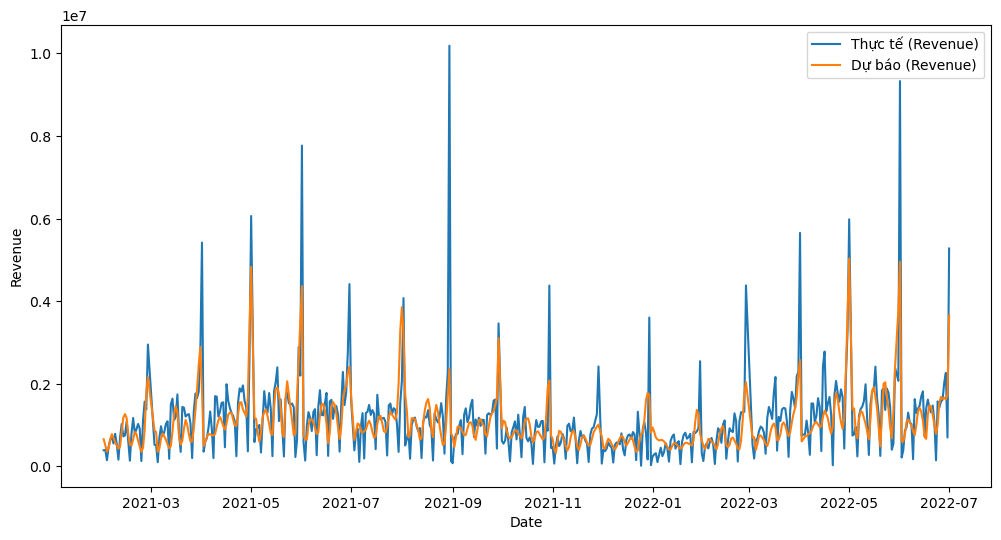

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
train_file = "D:/Du An/Data FLow/v1/data/train.csv"
test_file = "D:/Du An/Data FLow/v1/data/test.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# Chuyển đổi cột Date thành kiểu datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Thêm thông tin ngày trong tuần
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek

# Sắp xếp theo thời gian
df_train.sort_values(by='Date', inplace=True)
df_test.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_train = df_train[['Date', 'Revenue', 'Units', 'DayOfWeek']].groupby('Date').sum()
sales_test = df_test[['Date', 'Revenue', 'Units', 'DayOfWeek']].groupby('Date').sum()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
sales_train_scaled = scaler.fit_transform(sales_train)
sales_test_scaled = scaler.transform(sales_test)

# Tạo tập dữ liệu cho LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_lstm_dataset(sales_train_scaled, time_step)
X_test, y_test = create_lstm_dataset(sales_test_scaled, time_step)

# Xây dựng mô hình Bi-Directional LSTM
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_step, X_train.shape[2]))),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dropout(0.3),
    Dense(y_train.shape[1])
])

model.compile(optimizer=Adamax(learning_rate=0.002), loss='mse')

# Thêm EarlyStopping để tránh overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Dự báo
y_pred = model.predict(X_test)

# Chuyển đổi dữ liệu về dạng gốc
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Vẽ biểu đồ
dates = sales_test.index[time_step:]
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_inv[:, 0], label='Thực tế (Revenue)')
plt.plot(dates, y_pred_inv[:, 0], label='Dự báo (Revenue)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [ ]:
# Tính toán các hệ số đánh giá
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"R-Squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")

R-Squared: 0.5043
MAPE: 100081297795746880.0000
RMSE: 402378.6711


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Đọc dữ liệu từ file CSV
train_file = "D:/Du An/Data FLow/v1/data/train.csv"
test_file = "D:/Du An/Data FLow/v1/data/test.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# Chuyển đổi cột Date thành kiểu datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Thêm thông tin ngày trong tuần
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek

# Sắp xếp theo thời gian
df_train.sort_values(by='Date', inplace=True)
df_test.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_train = df_train[['Date', 'Revenue', 'Units']].groupby('Date').sum()
sales_test = df_test[['Date', 'Revenue', 'Units']].groupby('Date').sum()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
sales_train_scaled = scaler.fit_transform(sales_train)
sales_test_scaled = scaler.transform(sales_test)

# Hàm tạo tập dữ liệu LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :2])  # Chỉ lấy Revenue và Units
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_lstm_dataset(sales_train_scaled, time_step)
X_test, y_test = create_lstm_dataset(sales_test_scaled, time_step)

# Xây dựng mô hình Bi-Directional LSTM
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_step, X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])
])

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.Huber())

# Thêm EarlyStopping để tránh overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Dự báo
y_pred = model.predict(X_test)

# Chuyển đổi dữ liệu về dạng gốc
y_test_inv = scaler.inverse_transform(np.hstack((y_test, np.zeros((y_test.shape[0], 1)))))[:, :2]
y_pred_inv = scaler.inverse_transform(np.hstack((y_pred, np.zeros((y_pred.shape[0], 1)))))[:, :2]

# Đánh giá mô hình
r2 = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])
mape = mean_absolute_percentage_error(y_test_inv[:, 0], y_pred_inv[:, 0])
rmse = np.sqrt(mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))

print(f"R-Squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")

# Vẽ biểu đồ kết quả
dates = sales_test.index[time_step:]
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_inv[:, 0], label='Thực tế (Revenue)')
plt.plot(dates, y_pred_inv[:, 0], label='Dự báo (Revenue)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


Epoch 1/100


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - loss: 0.2264 - val_loss: 0.1084
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.2098 - val_loss: 0.1031
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.1888 - val_loss: 0.0910
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.1714 - val_loss: 0.0852
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.1623 - val_loss: 0.0832
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.1673 - val_loss: 0.0779
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.1378 - val_loss: 0.0727
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.1169 - val_loss: 0.0715
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.1205 - val_loss: 0.0639
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.1166 - val_loss: 0.0580
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.1191 - val_loss: 0.0556
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━━

ValueError: operands could not be broadcast together with shapes (505,3) (2,) (505,3) 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Đọc dữ liệu từ file CSV
train_file = "D:/Du An/Data FLow/v1/data/train.csv"
test_file = "D:/Du An/Data FLow/v1/data/test.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# Chuyển đổi cột Date thành kiểu datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Thêm thông tin ngày trong tuần
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek

# Sắp xếp theo thời gian
df_train.sort_values(by='Date', inplace=True)
df_test.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_train = df_train[['Date', 'Revenue', 'Units']].groupby('Date').sum()
sales_test = df_test[['Date', 'Revenue', 'Units']].groupby('Date').sum()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
sales_train_scaled = scaler.fit_transform(sales_train)
sales_test_scaled = scaler.transform(sales_test)

# Hàm tạo tập dữ liệu LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :2])  # Chỉ lấy Revenue và Units
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_lstm_dataset(sales_train_scaled, time_step)
X_test, y_test = create_lstm_dataset(sales_test_scaled, time_step)

# Xây dựng mô hình Bi-Directional LSTM
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_step, X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])
])

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.Huber())

# Thêm EarlyStopping để tránh overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Dự báo
y_pred = model.predict(X_test)

# Chuyển đổi dữ liệu về dạng gốc
# Tạo ma trận giả có số cột đúng với scaler ban đầu
dummy_column = np.zeros((y_test.shape[0], 1))  

# Kết hợp lại thành ma trận có đủ số cột
y_test_full = np.hstack((y_test, dummy_column))
y_pred_full = np.hstack((y_pred, dummy_column))

# Chuyển đổi về giá trị gốc
y_test_inv = scaler.inverse_transform(y_test_full)[:, :2]  
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, :2]  

# Đánh giá mô hình
r2 = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])
mape = mean_absolute_percentage_error(y_test_inv[:, 0], y_pred_inv[:, 0])
rmse = np.sqrt(mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))

print(f"R-Squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")

# Vẽ biểu đồ kết quả
dates = sales_test.index[time_step:]
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_inv[:, 0], label='Thực tế (Revenue)')
plt.plot(dates, y_pred_inv[:, 0], label='Dự báo (Revenue)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Epoch 1/100


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 35s 106ms/step - loss: 0.2162 - val_loss: 0.1030
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.1908 - val_loss: 0.1022
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.1947 - val_loss: 0.0922
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.1632 - val_loss: 0.0820
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.1570 - val_loss: 0.0789
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.1412 - val_loss: 0.0725
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.1387 - val_loss: 0.0676
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.1169 - val_loss: 0.0668
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.1104 - val_loss: 0.0669
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.1405 - val_loss: 0.0681
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.1042 - val_loss: 0.0597
Epoch 12/100
116/116 ━━━━━━━━━━━━

ValueError: operands could not be broadcast together with shapes (505,3) (2,) (505,3) 

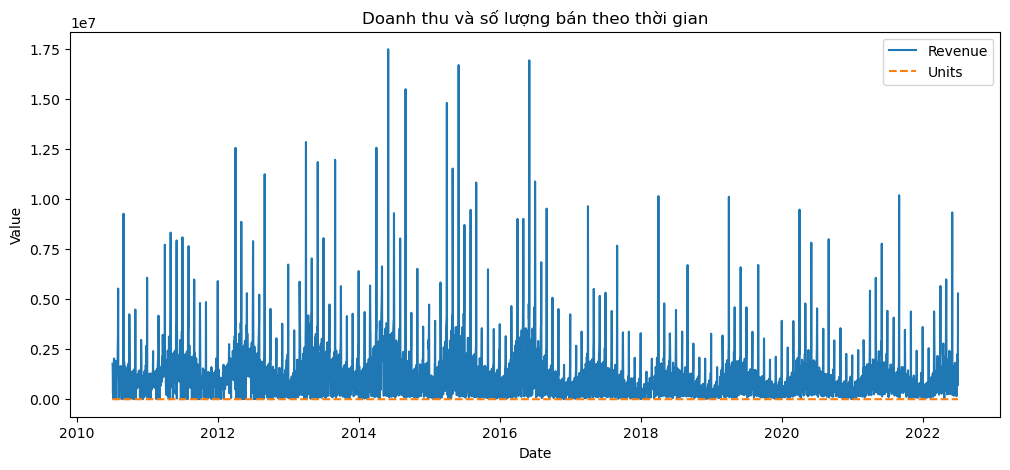

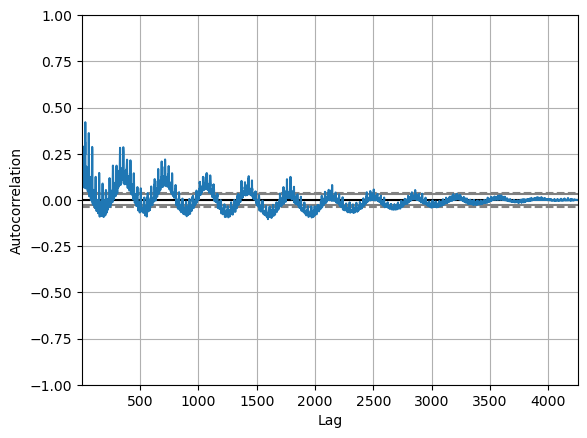

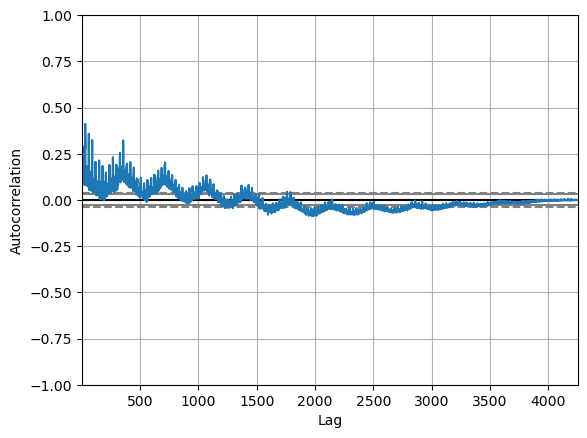

c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

Revenue - MAE: 683204.1489429392, MAPE: nan%, RMSE: 1144376.5927505835, R2: -0.30201411803202927
Units - MAE: 90.04704327960346, MAPE: nan%, RMSE: 148.56588887882378, R2: -0.2839250148761825


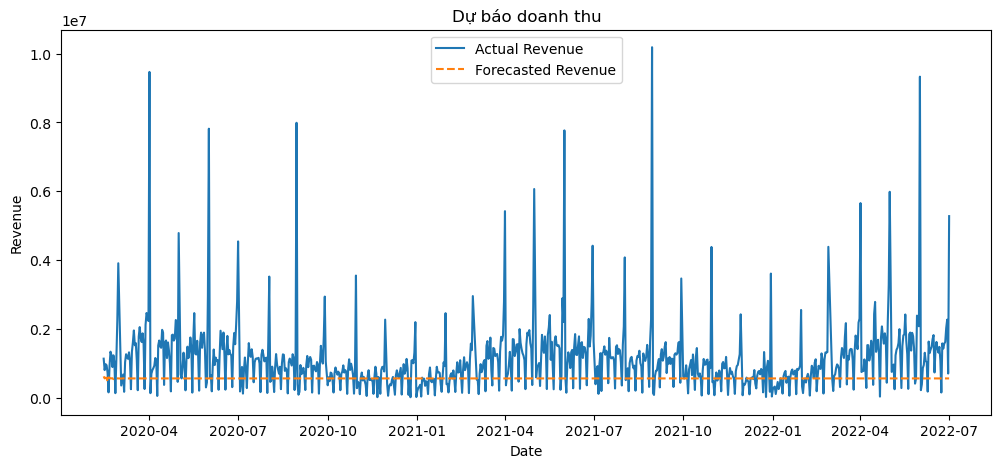

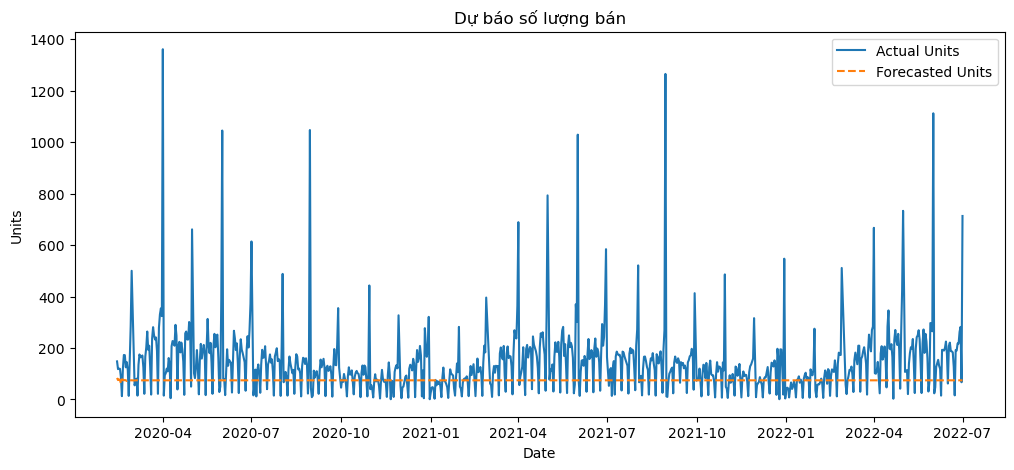

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Đọc dữ liệu
df = pd.read_excel(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx', sheet_name="SalesFact")


# Chuyển đổi cột Date thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Nhóm dữ liệu theo ngày và tổng hợp doanh thu và số lượng bán
df_time = df.groupby('Date')[['Revenue', 'Units']].sum().reset_index()

# Thiết lập cột Date làm index
df_time.set_index('Date', inplace=True)

# Vẽ biểu đồ doanh thu và số lượng bán theo thời gian
plt.figure(figsize=(12, 5))
plt.plot(df_time['Revenue'], label='Revenue')
plt.plot(df_time['Units'], label='Units', linestyle='dashed')
plt.title('Doanh thu và số lượng bán theo thời gian')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Kiểm tra tính dừng của chuỗi thời gian
autocorrelation_plot(df_time['Revenue'])
plt.show()

autocorrelation_plot(df_time['Units'])
plt.show()

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(df_time) * 0.8)
train, test = df_time[:train_size], df_time[train_size:]

# Huấn luyện mô hình ARIMA cho doanh thu
model_revenue = ARIMA(train['Revenue'], order=(5,1,0))
model_revenue_fit = model_revenue.fit()
forecast_revenue = model_revenue_fit.forecast(steps=len(test))

# Huấn luyện mô hình ARIMA cho số lượng bán
model_units = ARIMA(train['Units'], order=(5,1,0))
model_units_fit = model_units.fit()
forecast_units = model_units_fit.forecast(steps=len(test))

# Đánh giá mô hình
mae_revenue = mean_absolute_error(test['Revenue'], forecast_revenue)
mape_revenue = np.mean(np.abs((test['Revenue'] - forecast_revenue) / test['Revenue'])) * 100
rmse_revenue = np.sqrt(mean_squared_error(test['Revenue'], forecast_revenue))
r2_revenue = r2_score(test['Revenue'], forecast_revenue)

mae_units = mean_absolute_error(test['Units'], forecast_units)
mape_units = np.mean(np.abs((test['Units'] - forecast_units) / test['Units'])) * 100
rmse_units = np.sqrt(mean_squared_error(test['Units'], forecast_units))
r2_units = r2_score(test['Units'], forecast_units)

print(f'Revenue - MAE: {mae_revenue}, MAPE: {mape_revenue}%, RMSE: {rmse_revenue}, R2: {r2_revenue}')
print(f'Units - MAE: {mae_units}, MAPE: {mape_units}%, RMSE: {rmse_units}, R2: {r2_units}')

# Vẽ biểu đồ so sánh dự báo và thực tế cho doanh thu
plt.figure(figsize=(12,5))
plt.plot(test.index, test['Revenue'], label='Actual Revenue')
plt.plot(test.index, forecast_revenue, label='Forecasted Revenue', linestyle='dashed')
plt.title('Dự báo doanh thu')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Vẽ biểu đồ so sánh dự báo và thực tế cho số lượng bán
plt.figure(figsize=(12,5))
plt.plot(test.index, test['Units'], label='Actual Units')
plt.plot(test.index, forecast_units, label='Forecasted Units', linestyle='dashed')
plt.title('Dự báo số lượng bán')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

17:17:55 - cmdstanpy - INFO - Chain [1] start processing
17:17:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
               Model           MAE        MAPE          RMSE        R2
0            Prophet  9.202021e+05  317.642658  1.278427e+06 -0.624912
1               LSTM  5.241909e+05  106.864954  9.421919e+05  0.126386
2            XGBoost  9.133465e+05  311.172770  1.282082e+06 -0.634217
3  Linear Regression  8.823748e+05  298.674367  1.164687e+06 -0.348641
4      Random Forest  1.031631e+06  348.906788  1.533678e+06 -1.338546


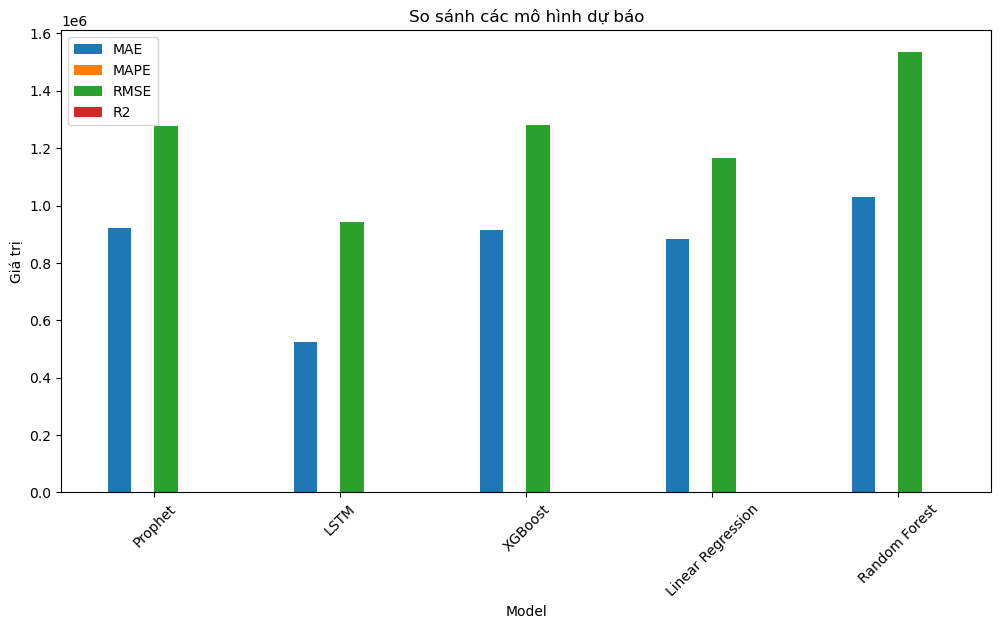

In [ ]:


# Đọc dữ liệu
df = pd.read_excel(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx', sheet_name="SalesFact")


# Chuyển đổi cột Date thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Nhóm dữ liệu theo ngày và tổng hợp doanh thu và số lượng bán
df_time = df.groupby('Date')[['Revenue', 'Units']].sum().reset_index()

# Thiết lập cột Date làm index
df_time.set_index('Date', inplace=True)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(df_time) * 0.8)
train, test = df_time[:train_size], df_time[train_size:]

### Mô hình Facebook Prophet ###
def train_prophet(df, target):
    df_prophet = df.reset_index().rename(columns={'Date': 'ds', target: 'y'})
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=len(test), freq='D')
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']].set_index('ds')

forecast_revenue_prophet = train_prophet(train, 'Revenue')

### Mô hình LSTM ###
def create_lstm_model():
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(10, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

# Chuẩn bị dữ liệu cho LSTM
def prepare_lstm_data(series, n_steps=10):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

X_train, y_train = prepare_lstm_data(train['Revenue'].values)
X_test, y_test = prepare_lstm_data(test['Revenue'].values)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = create_lstm_model()
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
lstm_forecast = lstm_model.predict(X_test)

### Mô hình XGBoost ###
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(np.arange(len(train)).reshape(-1, 1), train['Revenue'])
xgb_forecast = xgb_model.predict(np.arange(len(test)).reshape(-1, 1))

### Mô hình Linear Regression ###
lr_model = LinearRegression()
lr_model.fit(np.arange(len(train)).reshape(-1, 1), train['Revenue'])
lr_forecast = lr_model.predict(np.arange(len(test)).reshape(-1, 1))

### Mô hình Random Forest ###
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(np.arange(len(train)).reshape(-1, 1), train['Revenue'])
rf_forecast = rf_model.predict(np.arange(len(test)).reshape(-1, 1))

### Đánh giá mô hình ###
def evaluate_model(true, pred, model_name):
    mae = mean_absolute_error(true, pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2 = r2_score(true, pred)
    return {"Model": model_name, "MAE": mae, "MAPE": mape, "RMSE": rmse, "R2": r2}

# So sánh các mô hình
results = []
results.append(evaluate_model(test['Revenue'], forecast_revenue_prophet['yhat'].values[:len(test)], 'Prophet'))
results.append(evaluate_model(test['Revenue'][10:], lstm_forecast.flatten(), 'LSTM'))
results.append(evaluate_model(test['Revenue'], xgb_forecast, 'XGBoost'))
results.append(evaluate_model(test['Revenue'], lr_forecast, 'Linear Regression'))
results.append(evaluate_model(test['Revenue'], rf_forecast, 'Random Forest'))

# Hiển thị kết quả so sánh
results_df = pd.DataFrame(results)
print(results_df)

# Vẽ biểu đồ so sánh các mô hình
results_df.set_index("Model").plot(kind='bar', figsize=(12,6))
plt.title('So sánh các mô hình dự báo')
plt.ylabel('Giá trị')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pip install prophet


In [ ]:


# Load Data
train_file = "D:/Du An/Data FLow/v1/data/train.csv"
test_file = "D:/Du An/Data FLow/v1/data/test.csv"
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# Convert Date to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Feature Engineering
def add_features(df):
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter
    df['Year'] = df['Date'].dt.year
    return df

df_train = add_features(df_train)
df_test = add_features(df_test)

# Aggregate sales data
sales_train = df_train.groupby('Date').sum()
sales_test = df_test.groupby('Date').sum()

# Scale Data
scaler = StandardScaler()
sales_train_scaled = scaler.fit_transform(sales_train[['Revenue', 'Units']])
sales_test_scaled = scaler.transform(sales_test[['Revenue', 'Units']])

# Create Time-Series Dataset
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_lstm_dataset(sales_train_scaled, time_step)
X_test, y_test = create_lstm_dataset(sales_test_scaled, time_step)

# LSTM Model
model_lstm = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(time_step, X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.2),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.Huber())

# Train LSTM
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

y_pred_lstm = model_lstm.predict(X_test)

# Inverse transform
y_test_inv = scaler.inverse_transform(np.hstack((y_test, np.zeros((y_test.shape[0], 1)))))[:, :2]
y_pred_inv_lstm = scaler.inverse_transform(np.hstack((y_pred_lstm, np.zeros((y_pred_lstm.shape[0], 1)))))[:, :2]

# Prophet Model
df_prophet = df_train[['Date', 'Revenue']].rename(columns={'Date': 'ds', 'Revenue': 'y'})
prophet = Prophet()
prophet.fit(df_prophet)
future = prophet.make_future_dataframe(periods=len(df_test), freq='D')
forecast = prophet.predict(future)
y_pred_prophet = forecast[['ds', 'yhat']].set_index('ds').loc[df_test['Date']].values.flatten()

# XGBoost Model
xgb = XGBRegressor(n_estimators=1000, max_depth=8, learning_rate=0.01, subsample=0.8)
x_train_xgb = df_train[['DayOfWeek', 'Month', 'Quarter', 'Year']]
y_train_xgb = df_train['Revenue']
x_test_xgb = df_test[['DayOfWeek', 'Month', 'Quarter', 'Year']]
xgb.fit(x_train_xgb, y_train_xgb)
y_pred_xgb = xgb.predict(x_test_xgb)

# Linear Regression (Ridge)
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_xgb)
x_test_poly = poly.transform(x_test_xgb)
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_poly, y_train_xgb)
y_pred_lr = ridge.predict(x_test_poly)

# Evaluation
models = {'LSTM': y_pred_inv_lstm[:, 0], 'Prophet': y_pred_prophet, 'XGBoost': y_pred_xgb, 'Linear Regression': y_pred_lr}
results = []
for name, pred in models.items():
    mae = mean_absolute_error(y_test_inv[:, 0], pred)
    mape = mean_absolute_percentage_error(y_test_inv[:, 0], pred)
    rmse = np.sqrt(mean_squared_error(y_test_inv[:, 0], pred))
    r2 = r2_score(y_test_inv[:, 0], pred)
    results.append([name, mae, mape, rmse, r2])

df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'MAPE', 'RMSE', 'R2'])
print(df_results)

# Plot Results
dates = sales_test.index[time_step:]
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_inv[:, 0], label='Actual Revenue')
plt.plot(dates, y_pred_inv_lstm[:, 0], label='LSTM Forecast')
plt.plot(dates, y_pred_prophet, label='Prophet Forecast')
plt.plot(dates, y_pred_xgb, label='XGBoost Forecast')
plt.plot(dates, y_pred_lr, label='Linear Regression Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


Epoch 1/100


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  8/116 ━━━━━━━━━━━━━━━━━━━━ 23s 219ms/step - loss: 0.6821

KeyboardInterrupt: 

18:38:22 - cmdstanpy - INFO - Chain [1] start processing
18:38:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
               Model           MAE        MAPE          RMSE        R2
0            Prophet  9.202021e+05  317.642658  1.278427e+06 -0.624912
1               LSTM  5.028815e+05  129.058363  9.325393e+05  0.144194
2            XGBoost  9.133465e+05  311.172770  1.282082e+06 -0.634217
3  Linear Regression  8.823748e+05  298.674367  1.164687e+06 -0.348641
4      Random Forest  1.029837e+06  348.633855  1.539228e+06 -1.355502


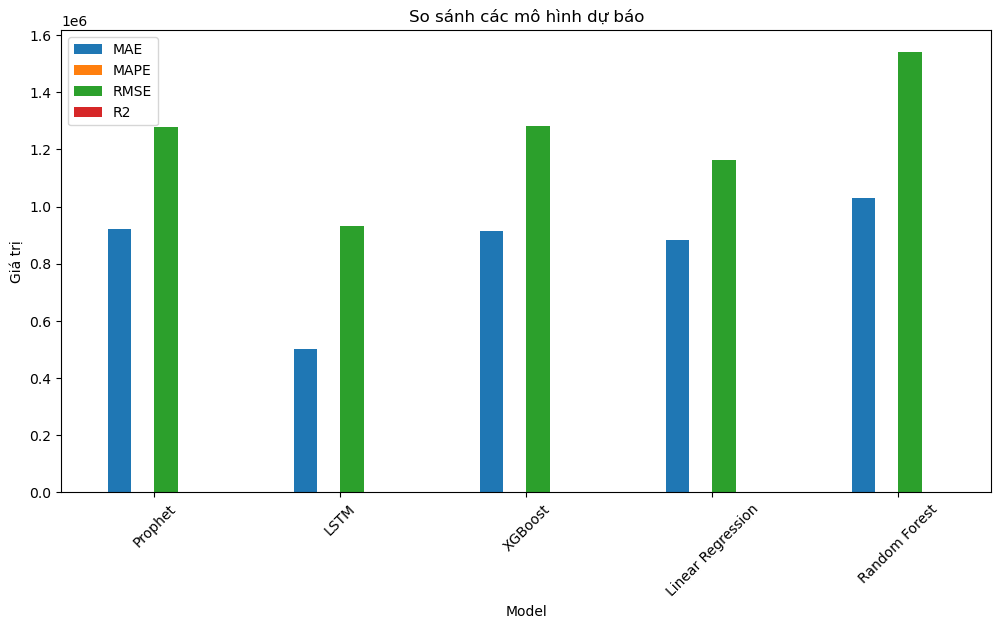

In [ ]:
# Chuyển đổi cột Date thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Nhóm dữ liệu theo ngày và tổng hợp doanh thu và số lượng bán
df_time = df.groupby('Date')[['Revenue', 'Units']].sum().reset_index()

# Thiết lập cột Date làm index
df_time.set_index('Date', inplace=True)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(df_time) * 0.8)
train, test = df_time[:train_size], df_time[train_size:]

### Mô hình Facebook Prophet ###
def train_prophet(df, target):
    df_prophet = df.reset_index().rename(columns={'Date': 'ds', target: 'y'})
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=len(test), freq='D')
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']].set_index('ds')

forecast_revenue_prophet = train_prophet(train, 'Revenue')

### Mô hình LSTM ###
def create_lstm_model():
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(10, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

# Chuẩn bị dữ liệu cho LSTM
def prepare_lstm_data(series, n_steps=10):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

X_train, y_train = prepare_lstm_data(train['Revenue'].values)
X_test, y_test = prepare_lstm_data(test['Revenue'].values)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = create_lstm_model()
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
lstm_forecast = lstm_model.predict(X_test)

### Mô hình XGBoost ###
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(np.arange(len(train)).reshape(-1, 1), train['Revenue'])
xgb_forecast = xgb_model.predict(np.arange(len(test)).reshape(-1, 1))

### Mô hình Linear Regression ###
lr_model = LinearRegression()
lr_model.fit(np.arange(len(train)).reshape(-1, 1), train['Revenue'])
lr_forecast = lr_model.predict(np.arange(len(test)).reshape(-1, 1))

### Mô hình Random Forest ###
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(np.arange(len(train)).reshape(-1, 1), train['Revenue'])
rf_forecast = rf_model.predict(np.arange(len(test)).reshape(-1, 1))

### Đánh giá mô hình ###
def evaluate_model(true, pred, model_name):
    mae = mean_absolute_error(true, pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2 = r2_score(true, pred)
    return {"Model": model_name, "MAE": mae, "MAPE": mape, "RMSE": rmse, "R2": r2}

# So sánh các mô hình
results = []
results.append(evaluate_model(test['Revenue'], forecast_revenue_prophet['yhat'].values[:len(test)], 'Prophet'))
results.append(evaluate_model(test['Revenue'][10:], lstm_forecast.flatten(), 'LSTM'))
results.append(evaluate_model(test['Revenue'], xgb_forecast, 'XGBoost'))
results.append(evaluate_model(test['Revenue'], lr_forecast, 'Linear Regression'))
results.append(evaluate_model(test['Revenue'], rf_forecast, 'Random Forest'))

# Hiển thị kết quả so sánh
results_df = pd.DataFrame(results)
print(results_df)

# Vẽ biểu đồ so sánh các mô hình
results_df.set_index("Model").plot(kind='bar', figsize=(12,6))
plt.title('So sánh các mô hình dự báo')
plt.ylabel('Giá trị')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
train_file = "D:/Du An/Data FLow/v1/data/train.csv"
test_file = "D:/Du An/Data FLow/v1/data/test.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# Chuyển đổi cột Date thành kiểu datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Thêm thông tin ngày trong tuần
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek

# Sắp xếp theo thời gian
df_train.sort_values(by='Date', inplace=True)
df_test.sort_values(by='Date', inplace=True)

# Chọn dữ liệu doanh thu và số lượng bán theo ngày
sales_train = df_train[['Date', 'Revenue', 'Units', 'DayOfWeek']].groupby('Date').sum()
sales_test = df_test[['Date', 'Revenue', 'Units', 'DayOfWeek']].groupby('Date').sum()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
sales_train_scaled = scaler.fit_transform(sales_train)
sales_test_scaled = scaler.transform(sales_test)

# Tạo tập dữ liệu cho LSTM
def create_lstm_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_lstm_dataset(sales_train_scaled, time_step)
X_test, y_test = create_lstm_dataset(sales_test_scaled, time_step)

# Xây dựng mô hình Bi-Directional LSTM
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_step, X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='relu')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Thêm EarlyStopping và ReduceLROnPlateau để tối ưu hóa quá trình huấn luyện
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping, reduce_lr])

# Dự báo
y_pred = model.predict(X_test)

# Chuyển đổi dữ liệu về dạng gốc
y_test_inv = scaler.inverse_transform(np.hstack((y_test, np.zeros((y_test.shape[0], 1)))))[:, :y_test.shape[1]]
y_pred_inv = scaler.inverse_transform(np.hstack((y_pred, np.zeros((y_pred.shape[0], 1)))))[:, :y_pred.shape[1]]

# Vẽ biểu đồ
dates = sales_test.index[time_step:]
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_inv[:, 0], label='Thực tế (Revenue)')
plt.plot(dates, y_pred_inv[:, 0], label='Dự báo (Revenue)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Epoch 1/200


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - loss: 0.0052 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0049 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0046 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0046 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0045 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0045 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0053 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0042 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 9/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0040 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 10/200
58/

ValueError: operands could not be broadcast together with shapes (505,4) (3,) (505,4) 